# Clustering

## Libraries

In [1]:
# main
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## CSV Loading

For the clustering we will only need the numerical values, that's why we will take only from the 3rd column (in this case this is not zero indexed) until the end of the file.

In [2]:
spotify_playlist = pd.read_csv("../data/spotify_playlist.csv")
final_list = spotify_playlist.iloc[:, 2:]

In [3]:
final_list

,duration,danceability,energy,acousticness,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,369600,0.483,0.721,0.729000,0.000000,0.1890,-6.836,0.0320,0.562,95.261
1,301240,0.485,0.863,0.000012,0.016200,0.1380,-9.027,0.0495,0.767,116.835
2,337413,0.364,0.457,0.290000,0.000106,0.9220,-14.162,0.0675,0.175,163.219
3,219146,0.398,0.413,0.082200,0.000025,0.0891,-10.934,0.0388,0.331,133.574
4,160892,0.518,0.756,0.735000,0.000062,0.3170,-10.851,0.0915,0.968,166.429
...,...,...,...,...,...,...,...,...,...,...
9942,199466,0.332,0.707,0.000012,0.006120,0.1100,-12.698,0.0361,0.652,144.815
9943,201734,0.464,0.749,0.224000,0.000046,0.3510,-8.564,0.4800,0.879,181.121
9944,183040,0.694,0.710,0.527000,0.001350,0.0697,-9.793,0.3400,0.415,119.964
9945,222160,0.332,0.800,0.000368,0.001600,0.0850,-9.746,0.0326,0.832,149.240


## Clustering

Let's start building the different clusters. For this project, I will use `KMeans`, as I think it's going to provide us the desired results for that project.

### Scaling the Playlist

Scaling the playlist will set all those values on a same range, avoiding that higher/small values might have difference influence on the model due to that.

In [4]:
# initilize the scaler
scaler = StandardScaler()

# scaling the playlist
playlist_scaled = scaler.fit_transform(final_list)

# creating a DF from the playlist scaled
df_scaled_playlist = pd.DataFrame(playlist_scaled)
df_scaled_playlist

,0,1,2,3,4,5,6,7,8,9
0,0.992413,-0.494621,0.446617,1.299280,-0.442946,-0.003282,0.613710,-0.520620,-0.060788,-0.930879
1,0.417466,-0.482624,1.054258,-0.945475,-0.375370,-0.335014,0.046626,-0.287289,0.771976,-0.159772
2,0.721702,-1.208453,-0.683082,-0.052522,-0.442504,4.764553,-1.282436,-0.047291,-1.632885,1.498105
3,-0.272992,-1.004501,-0.871365,-0.692396,-0.442840,-0.653086,-0.446951,-0.429954,-0.999171,0.438521
4,-0.762941,-0.284671,0.596388,1.317756,-0.442688,0.829301,-0.425469,0.272706,1.588491,1.612839
...,...,...,...,...,...,...,...,...,...,...
9942,-0.438512,-1.400407,0.386709,-0.945476,-0.417417,-0.517141,-0.903517,-0.465954,0.304815,0.840302
9943,-0.419437,-0.608594,0.566434,-0.255754,-0.442754,1.050455,0.166462,5.452655,1.226949,2.137967
9944,-0.576664,0.771079,0.399546,0.677266,-0.437315,-0.779275,-0.151633,3.586007,-0.657941,-0.047934
9945,-0.247642,-1.400407,0.784671,-0.944379,-0.436272,-0.679755,-0.139468,-0.512620,1.036023,0.998462


### Starting the Model

In [5]:
# intilize the model
kmeans = KMeans(n_clusters=8, random_state=42)

# fit the model
kmeans.fit(playlist_scaled)

# Predicting clusters
clusters = kmeans.predict(playlist_scaled)

Let's take an initial look about how many values are in each cluster for this initial model. Those numbers probably will change, as now we initialized the model with a random `n_clusters`, but we should find the ideal number of them to avoid bias or variance.

In [6]:
pd.Series(clusters).value_counts()

1    2494
5    2062
6    1678
3    1450
7     874
4     628
0     609
2     152
dtype: int64

#### Finding the optimal `n_clusters`

First of all, let's obtain the `inertia_` of the model without modification. After we know this number, we will use two different methods for setting the best number of clusters:
* **Elbow Method**
* **Silhoutte Score**

In [7]:
kmeans.inertia_

52046.81216480999

##### Elbow Method

In [8]:
K = range(2, 20)

inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(playlist_scaled)
    inertia.append(kmeans.inertia_)

print(inertia)

[82197.02437279059, 74265.72010390316, 67836.69533092239, 62063.92872555239, 58182.44129019722, 54663.41022900503, 52047.20473934559, 49540.598578438345, 47620.831446186836, 46111.88293933599, 44678.616487090134, 43624.565562853546, 42650.74557652134, 41745.20962381948, 40966.461593441476, 40253.46974639265, 39337.02889484799, 38640.07578602701]


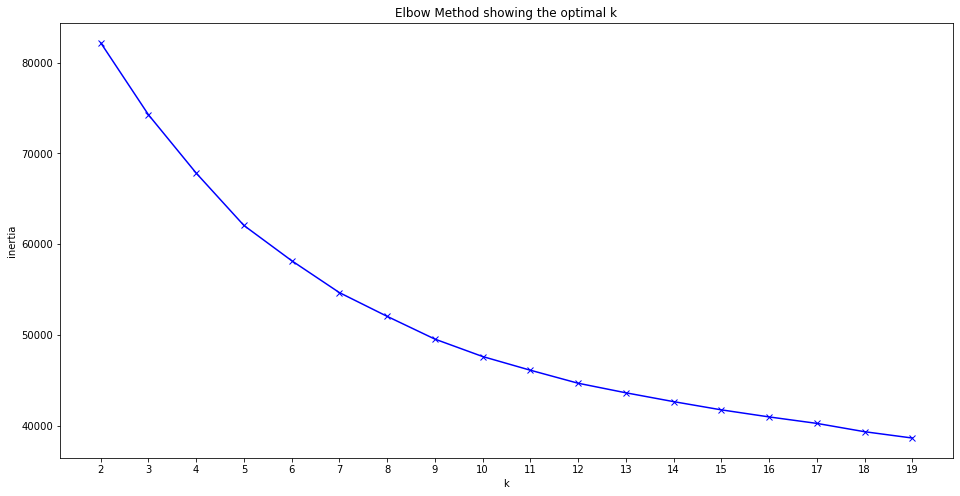

In [9]:
# Plot the results
plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

plt.show()

##### Silhoutte Score

In [10]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(playlist_scaled)
    silhouette.append(silhouette_score(X=playlist_scaled, labels=kmeans.predict(playlist_scaled)))

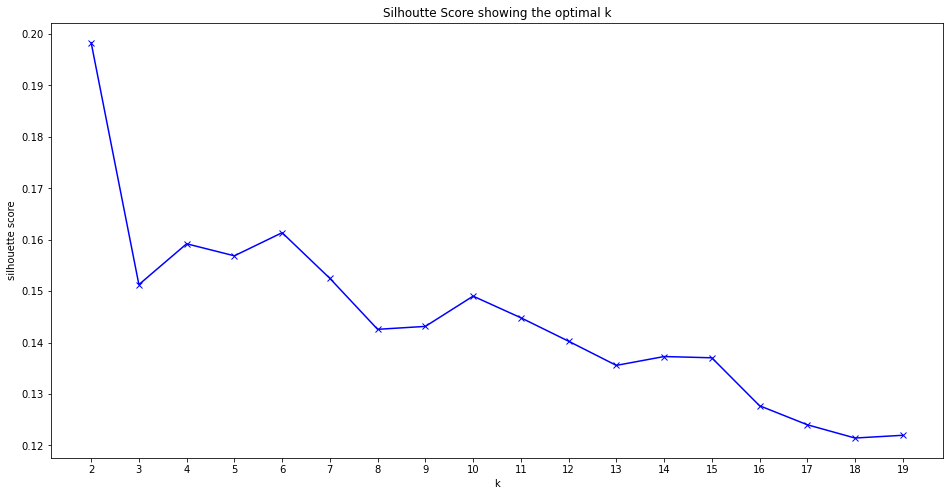

In [11]:
# Plot the results
plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhoutte Score showing the optimal k')

plt.show()

Looking into the results, the `Elbow Method` doesn't show us a clear winner for the `n_clusters` we should use. On the other hand, thanks to the `Silhoutte Score` we see that this score reach it's peak at 7. For that, we will redo the clustering with this new value in mind.

### Running the Final Model

In [12]:
# intilize the model
kmeans = KMeans(n_clusters=7, random_state=42)

# fit the model
kmeans.fit(playlist_scaled)

# Predicting clusters
clusters = kmeans.predict(playlist_scaled)

In [13]:
pd.Series(clusters).value_counts()

5    3135
3    2313
1    2109
4     902
0     687
2     644
6     157
dtype: int64

### Adding Clusters to the Original File

After identifying each song on the correct cluster, we need to add this column to the original CSV file for running the final model on the next Jupyter Notebook.

In [14]:
spotify_playlist["cluster"] = clusters

In [15]:
spotify_playlist.head()

,song,artist,duration,danceability,energy,acousticness,instrumentalness,liveness,loudness,speechiness,valence,tempo,cluster
0,Like a Rolling Stone,Bob Dylan,369600,0.483,0.721,0.729000,0.000000,0.1890,-6.836,0.0320,0.562,95.261,5
1,Smells Like Teen Spirit,Nirvana,301240,0.485,0.863,0.000012,0.016200,0.1380,-9.027,0.0495,0.767,116.835,3
2,A Day In The Life - Remastered,The Beatles,337413,0.364,0.457,0.290000,0.000106,0.9220,-14.162,0.0675,0.175,163.219,0
3,Good Vibrations (Mono),The Beach Boys,219146,0.398,0.413,0.082200,0.000025,0.0891,-10.934,0.0388,0.331,133.574,3
4,Johnny B Goode,Chuck Berry,160892,0.518,0.756,0.735000,0.000062,0.3170,-10.851,0.0915,0.968,166.429,5


In [16]:
# Storing it as a CSV
spotify_playlist.to_csv("../data/playlist_with_clusters.csv", index=False)